# Logistic Regression
### Kyle McLester

In [1]:
from copy import deepcopy as copy
from IPython.core.debugger import set_trace

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
T = iris.target

In [3]:
# now partition the data 

""" partitioning data

    parameters
    -----------
    X        numpy array
             input data to partition
    T        numpy array
             target labels to partition
    raito    list
             list of ratios for partitions (should be summed to 1) 
             the number of return pairs are different
    return
    -------
    
    Xs       list of numpy arrays
    
    Ts       list of numpy arrays
"""
def partition(X, T, ratio=[0.8, 0.2]): 
    
    # Checks to make sure ratio sums to 1
    assert(np.sum(ratio) == 1)
    
    # Store the number of data samples 
    N = X.shape[0]

    # change the 1d array to 2d if need
    if len(T.shape) == 1:
        T = T.reshape((N,1))
    
    # Shuffle the data indices 
    idxs = np.random.permutation(N)
        
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
         # Number of rows that corresponds to kth element in ratios
        nrows = int(round(N * r)) 
        
        # print (i, nrows)
        # If we are on the last ratio simply use the remaining data samples
        if k == len(ratio)-1:
            Xs.append(X[idxs[i:], :])
            Ts.append(T[idxs[i:], :])
        else:
            Xs.append(X[idxs[i:i+nrows], :])
            Ts.append(T[idxs[i:i+nrows], :])
        
        i += nrows
    
    return Xs, Ts

In [4]:
def partition_data():
    """Partition data into train and test splits."""
    global Xtrain, Xtest, Ttrain, Ttest
    data, targets = partition(copy(X), copy(T))
    # Fill in the right had side of the assignments below
    Xtrain, Xtest = data
    # Fill in the right had side of the assignments below
    Ttrain, Ttest = targets

In [5]:
partition_data()
print("Train data shape: {}".format(Xtrain.shape))
print("Train target shape: {}".format(Ttrain.shape))
print("Test data shape: {}".format(Xtest.shape))
print("Test target shape: {}".format(Ttest.shape))

Train data shape: (120, 4)
Train target shape: (120, 1)
Test data shape: (30, 4)
Test target shape: (30, 1)


## Applying Logistic Regression

In [6]:
np.unique(Ttrain)

array([0, 1, 2])

In [7]:
Ttrain

array([[2],
       [0],
       [1],
       [0],
       [2],
       [0],
       [2],
       [2],
       [1],
       [1],
       [2],
       [0],
       [0],
       [2],
       [0],
       [2],
       [2],
       [0],
       [2],
       [1],
       [1],
       [1],
       [2],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [0],
       [2],
       [0],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [2],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [2],
       [0],
       [0],
       [1],
       [2],
       [0],
       [1],
       [0],
       [0],
       [2],
       [1],
       [1],
       [2],
       [1],
       [2],
    

In [8]:
Ttrain == 1

array([[False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [

In [9]:
Ttrain == np.unique(Ttrain)

array([[False, False,  True],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False,  True, False],
       [Fa

In [10]:
1

(Ttrain == np.unique(Ttrain)).astype(int)

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1,

In [16]:
def convert_to_indicators():
    global Titrain, Titest
    Titrain = (Ttrain == np.unique(Ttrain)).astype(int) 
    Titest = (Ttest == np.unique(Ttest)).astype(int)

In [17]:
convert_to_indicators()
print("Train indicator shape: {}".format(Titrain.shape))
print("Test indicator shape: {}".format(Titest.shape))

Train indicator shape: (120, 3)
Test indicator shape: (30, 3)


In [18]:
assert (np.argmax(Titrain, axis=1) == Ttrain.flatten()).all()
assert (np.argmax(Titest, axis=1) == Ttest.flatten()).all()

In [19]:
def softmax(z):
    if not isinstance(z, np.ndarray):
        z = np.asarray(z)
        
    numerator = np.exp(z)

    if len(z.shape) == 2:
        denominator = np.sum(np.exp(z), axis=1, keepdims=True)
    else:
        denominator = np.sum(np.exp(z))

    return numerator / denominator

# Wrapper for softmax
def g(X, w):

    return softmax(X @ w) 

In [20]:
# Convert to indicators
convert_to_indicators()

# Set shape parameters
Ntrain, D = Xtrain.shape
Ntest = Xtest.shape[0]
K = Titrain.shape[1]

# initialize the weight matrix
w = np.random.rand(D+1, K)

# iterate to update weights
niter = 1000
alpha = 0.1

# Add bias to data
X1train = np.hstack((np.ones((Ntrain, 1)), Xtrain))

likeli = []
for step in range(niter):

    ys = g(X1train, w)

    w += alpha * X1train.T @ (Titrain - ys)
    
# Get class probabilities for each sample in X1train
Ytrain = g(X1train, w)

# Add bias to test data
X1test = np.hstack((np.ones((Ntest,1)), Xtest))
# Get class probabilities for each sample in X1test
Ytest = g(X1test, w)

print(Ytrain)
print(Ytest)

[[1.92622126e-174 1.40148307e-091 1.00000000e+000]
 [1.00000000e+000 3.06830329e-092 0.00000000e+000]
 [1.16851351e-031 1.00000000e+000 2.51252647e-076]
 [1.00000000e+000 3.37920155e-092 0.00000000e+000]
 [1.00123724e-084 5.62032726e-011 1.00000000e+000]
 [1.00000000e+000 8.78854363e-091 0.00000000e+000]
 [1.78252759e-102 1.31620337e-026 1.00000000e+000]
 [9.32477078e-125 1.03481091e-045 1.00000000e+000]
 [9.09123167e-045 1.00000000e+000 1.27879136e-060]
 [3.14485112e-033 1.00000000e+000 2.80834611e-075]
 [3.33817170e-148 1.11240877e-070 1.00000000e+000]
 [1.00000000e+000 1.27254716e-083 0.00000000e+000]
 [1.00000000e+000 5.36065203e-077 0.00000000e+000]
 [6.67150855e-180 1.18028809e-068 1.00000000e+000]
 [1.00000000e+000 1.74275856e-066 0.00000000e+000]
 [1.95278238e-158 6.98510850e-094 1.00000000e+000]
 [2.54317451e-118 1.54484160e-054 1.00000000e+000]
 [1.00000000e+000 2.39918273e-077 0.00000000e+000]
 [9.11152400e-161 1.93173945e-073 1.00000000e+000]
 [1.17901804e-040 1.00000000e+0

In [21]:
Ltrain = np.argmax(Ytrain, axis=1) 
Ltrain 

array([2, 0, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 0, 2, 2, 0, 2, 1, 1, 1,
       2, 0, 1, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 1, 2, 2, 2, 2,
       1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2,
       1, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2,
       2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 0, 2,
       2, 1, 1, 0, 0, 2, 1, 2, 1, 2], dtype=int64)

In [22]:
Ltest = np.argmax(Ytest, axis=1) 
Ltest 

array([0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 0,
       0, 2, 0, 2, 0, 0, 2, 2], dtype=int64)

Text(0.5, 1.0, 'Training results')

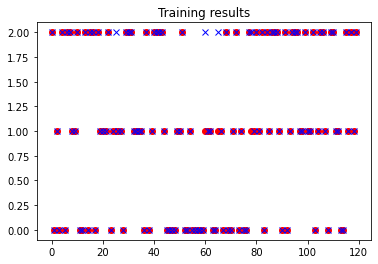

In [23]:
plt.plot(Ttrain, 'ro')
plt.plot(Ltrain, 'bx')
plt.title("Training results")

Text(0.5, 1.0, 'Test results')

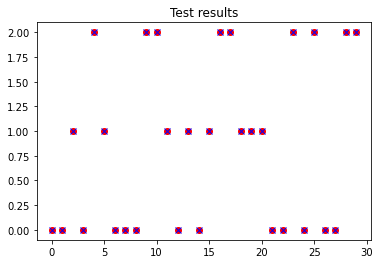

In [24]:
plt.plot(Ttest, 'ro')
plt.plot(Ltest, 'bx')
plt.title("Test results")

In [25]:
Ltest==Ttest.flatten()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [26]:
def print_accuracy(y, t, name):
    N = y.shape[0]
    n_correct = np.sum(y.flat == t.flat)
    n_correct_percent =  (n_correct / N) * 100
    print("{} accyracy:\t{}/{}\t{} %".format(name, n_correct, N, n_correct_percent))

In [27]:
print_accuracy(Ltrain, Ttrain, "Train")
print_accuracy(Ltest, Ttest, "Test")

Train accyracy:	116/120	96.66666666666667 %
Test accyracy:	30/30	100.0 %


## Create Confusion Matrix

In [28]:
def confusion_matrix(Y, T):
    """
        Y    ndarray
             predicted labels
        T    ndarray
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

In [29]:
cfm = confusion_matrix(Ltest.flat, Ttest.flat)
cfm

,0,1,2
0,13,0,0
1,0,8,0
2,0,0,9


In [30]:
type(cfm)

pandas.core.frame.DataFrame

## Precision, Recall, and F1-score 
Now that we have our confusion matrix we can use it to compute new metrics that inform us about different aspects of our models performance. Recall that we discussed precision, recall, and the F1-score in the class notes. Let's do a quick review of what these scores mean and how to compute them.

### Precision
Precision represents the accuracy when only looking at our **positive predictions**. Meaning, we want to know how many of our positive predictions were correct out of all the positive predictions made. Hence, we divide by the sum of the true positives $\mathrm{TP}$ and false positives $\mathrm{FP}$. Notice, the sum these two variables is equal the total number of positive predictions made for a given class.
$$
Precision = \mathrm{\frac{TP}{TP + FP}}
$$

### Recall
Recall represents the accuracy when only looking at the **positive targets**. This means we want to know how many positive predictions we got correct out of the actual positive targets. Hence, we divide by the sum of true positives $\mathrm{TP}$ and false negatives $\mathrm{FN}$. Notice the sum these two variables is equal the total number of targets for a given class.
$$
Recall = \mathrm{\frac{TP}{TP + FN}}
$$

### F1-score
The F1-score is used to gain a combined measure of both precision and recall. To do so we calculate the harmonic mean (the reciprocal of the arithmetic mean) of the precision and recall scores. F1-score is a good alternative to accuracy if the number false negatives and false positives are important to your problem. 
$$
F_1 = 2 \times \frac{Precision \times Recall}{Precision+Recall} = \frac{2 \times tp}{2 \times tp + fp + fn}
$$

In [31]:
for i in range(3):
    t_name = iris.target_names[i]
    print("{}:".format(t_name))

    precision = cfm.iloc[i, i] / np.sum(cfm.iloc[i, :])

    recall = cfm.iloc[i, i] / np.sum(cfm.iloc[:, i])

    f1 = 2 * precision * recall / (precision + recall)
    # Print scores for each class
    print("\tPrecision ({}): {:.5f}".format(t_name, precision))
    print("\tRecall ({}): {:.5f}".format(t_name, recall))
    print("\tF1 Score ({}): {:.5f}".format(t_name, f1))

setosa:
	Precision (setosa): 1.00000
	Recall (setosa): 1.00000
	F1 Score (setosa): 1.00000
versicolor:
	Precision (versicolor): 1.00000
	Recall (versicolor): 1.00000
	F1 Score (versicolor): 1.00000
virginica:
	Precision (virginica): 1.00000
	Recall (virginica): 1.00000
	F1 Score (virginica): 1.00000
